In [1]:
from bmc.simulate import simulate

BMCTool simulation: 100%|██████████| 328/328 [00:00<00:00, 16849.96it/s]


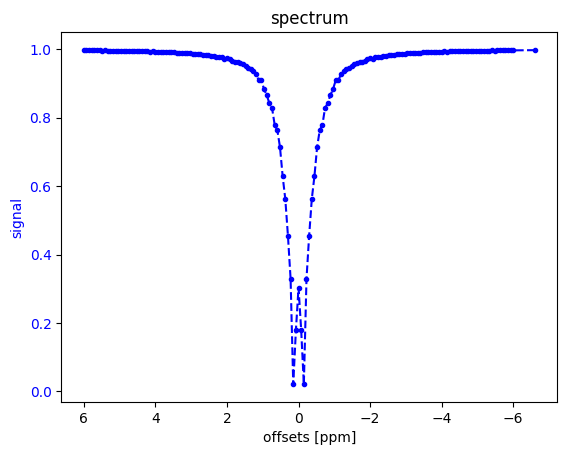

In [2]:
seq_path = '/Users/danielmiksch/JupyterLab/optim/seq_init/default_seqid.seq'
config_path = '/Users/danielmiksch/JupyterLab/optim/seq_init/config_1pool.yaml'

seq_path_win = 'C:/Users/s436276/simulation/JupyterLab/optim/seq_init/default_seqid.seq'
config_path_win = 'C:/Users/s436276/simulation/JupyterLab/optim/seq_init/config_1pool.yaml'


simulate(config_file=config_path, seq_file=seq_path, show_plot=True)
# simulate(config_file=config_path_win, seq_file=seq_path_win, show_plot=True)  # simulation windows

In [3]:
from bmc.simulate import simulate_fid

BMCTool simulation: 100%|██████████| 3/3 [00:00<00:00, 39.22it/s]


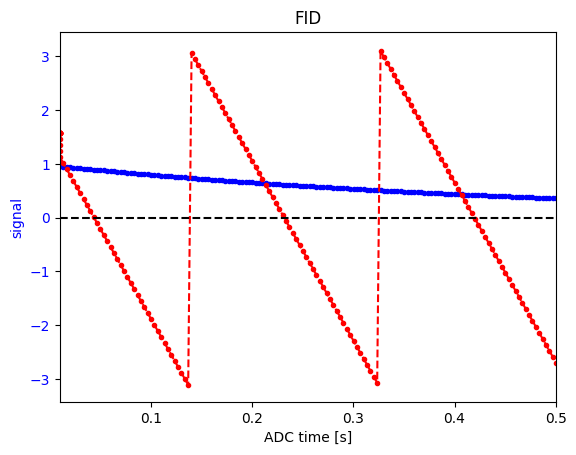

CPU times: user 1 μs, sys: 1 μs, total: 2 μs
Wall time: 10 μs


In [7]:
# seq_path_gauss = '/Users/danielmiksch/JupyterLab/optim/seq_init/simple_gauss.seq'
seq_path_gauss = '/Users/danielmiksch/JupyterLab/optim/seq_init/simple_gauss_gradient.seq'
# seq_path_gauss_win = 'C:/Users/s436276/simulation/JupyterLab/optim/seq_init/simple_gauss.seq'

sim = simulate_fid(config_file=config_path, seq_file=seq_path_gauss, adc_time=5, show_plot=True, plt_range=[10e-3, 0.5])  # simulation mac
# sim = simulate_fid(config_file=config_path_win, seq_file=seq_path_gauss_win, adc_time=.5, show_plot=True)  # simulation windows
%time

In [8]:
sim.get_time()[250:350]

array([0.0085  , 0.008534, 0.008568, 0.008602, 0.008636, 0.00867 ,
       0.008704, 0.008738, 0.008772, 0.008806, 0.00884 , 0.008874,
       0.008908, 0.008942, 0.008976, 0.00901 , 0.009044, 0.009078,
       0.009112, 0.009146, 0.00918 , 0.009214, 0.009248, 0.009282,
       0.009316, 0.00935 , 0.009384, 0.009418, 0.009452, 0.009486,
       0.00952 , 0.009554, 0.009588, 0.009622, 0.009656, 0.00969 ,
       0.009724, 0.009758, 0.009792, 0.009826, 0.00986 , 0.009894,
       0.009928, 0.009962, 0.009996, 0.01003 , 0.010064, 0.010098,
       0.010132, 0.010166, 0.98353 , 0.986864, 0.990198, 0.993532,
       0.996866, 1.0002  , 1.003534, 1.006868, 1.010202, 1.013536,
       1.01687 , 1.020204, 1.023538, 1.026872, 1.030206, 1.03354 ,
       1.036874, 1.040208, 1.043542, 1.046876, 1.05021 , 1.053544,
       1.056878, 1.060212, 1.063546, 1.06688 , 1.070214, 1.073548,
       1.076882, 1.080216, 1.08355 , 1.086884, 1.090218, 1.093552,
       1.096886, 1.10022 , 1.103554, 1.106888, 1.110222, 1.113

In [5]:
import numpy as np
magz = sim.get_mag(return_zmag=True)[1][:20]
t = np.linspace(0, 5, len(magz))
magz

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [8]:
sim.animate(run_time=.1, track_path=True, ie=False, **{'quality': '-ql', 'write': '--write_to_movie'}) #--write_to_movie

Manim Community v0.18.1